## Unsupervised Learning
- Unsupervised learning allows us to approach problems with little or no idea what our results should look like.
- We can derive this structure by clustering the data based on relationships among the variables in the data.
- With unsupervised learning there is no feedback based on the prediction results.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster, decomposition
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv("/home/znagy2/data_development/notebooks/ML_practice/input/USArrests.csv", index_col=0)

### 1. K-Means Clustering
- Classifying a given data set into a number of clusters (K)
- K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster
- then performs iterative (repetitive) calculations to optimize the positions of the centroids

In [3]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans_model = kmeans.fit(data)
k_values = kmeans_model.labels_

/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


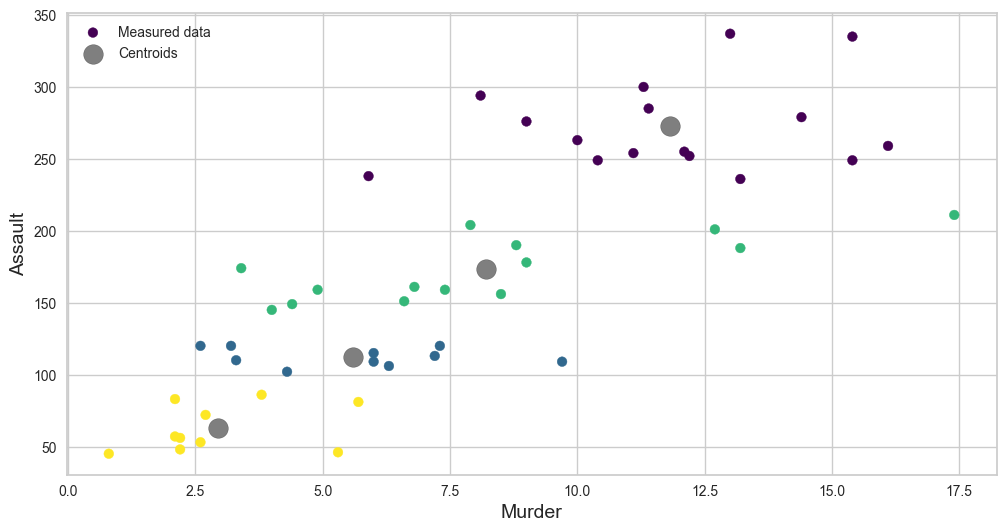

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=k_values, cmap="viridis", label="Measured data")
# get cetroid location
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, alpha=0.5, label="Centroids")
plt.xlabel("Murder", fontsize=14)
plt.ylabel("Assault", fontsize=14)
plt.legend()
plt.show()


K-Mean clustering is a simple technique, we have to only know the group number or k.
However, thats the reason why we try to use it. Fortunately, there are quantitative methods to find the optimal k value (Elbow, Silhouette methods). I'll present the Elbow method.

/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/znagy2

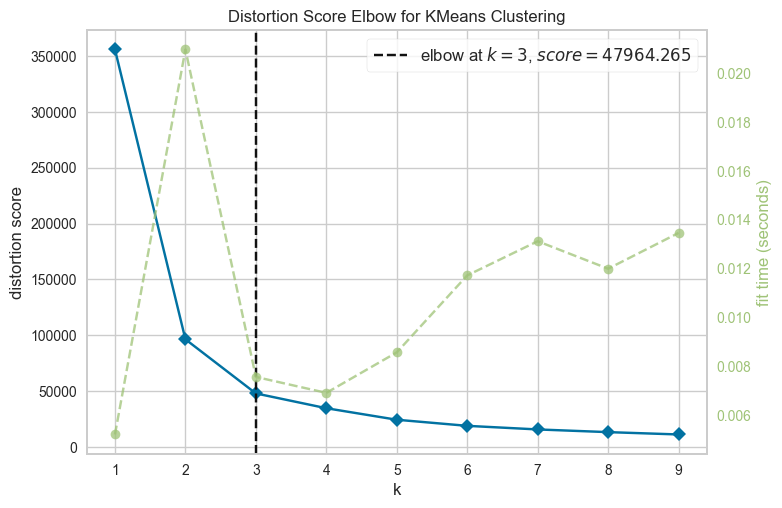

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
kmeans_best = cluster.KMeans()
visualizer = KElbowVisualizer(kmeans_best, k=range(1, 10))
visualizer.fit(data)
visualizer.poof()

According to the Elbow method, the optimal group number is likely to be 3.

In [6]:
kmeans_tuned = cluster.KMeans(n_clusters=3)
kmeans_model_tuned = kmeans_tuned.fit(data)
k_values_tuned = kmeans_model_tuned.labels_

/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


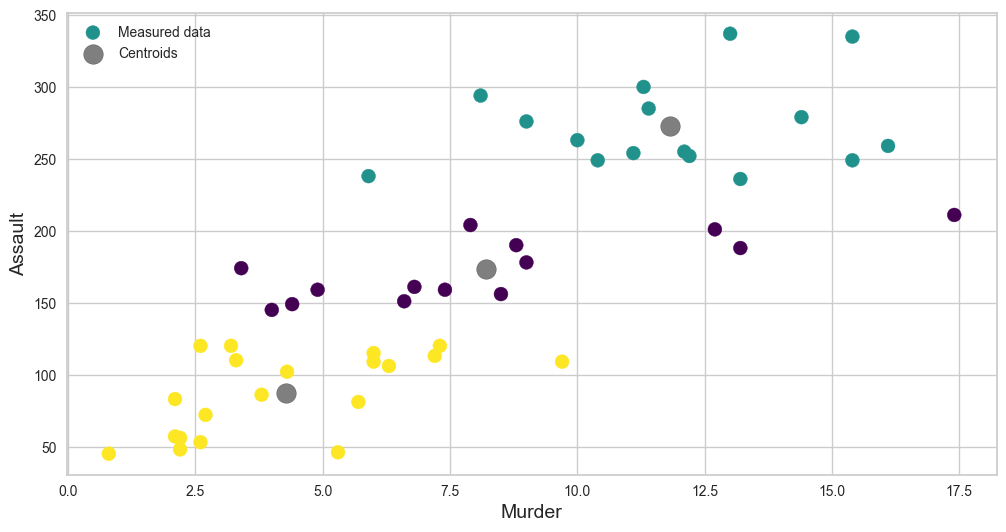

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(data["Murder"], data["Assault"], c=k_values_tuned, cmap="viridis", label="Measured data", s=100)
# get cetroid location
centers = kmeans_model_tuned.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5, label="Centroids")
plt.xlabel("Murder", fontsize=14)
plt.ylabel("Assault", fontsize=14)
plt.legend()
plt.show()

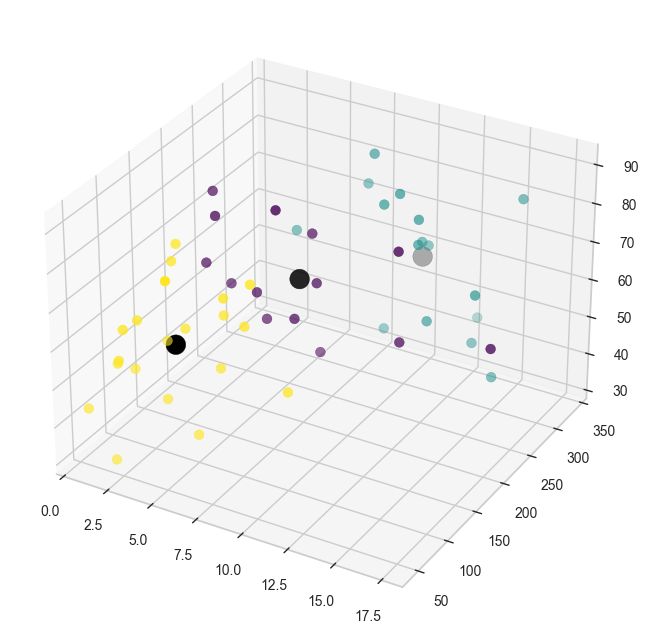

In [8]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

ax.scatter3D(data["Murder"], data["Assault"], data["UrbanPop"], c=k_values_tuned, cmap="viridis", s=50)
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c="black", s=200)

plt.show()

### 2. Hierarchical Cluster Analysis
Two categories:
- Agglomerative: This is a "bottom-up" approach: Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- Divisive: This is a "top-down" approach: All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In [9]:
hc_complete = scipy.cluster.hierarchy.linkage(data,"complete")
hc_average = scipy.cluster.hierarchy.linkage(data,"average")
hc_single = scipy.cluster.hierarchy.linkage(data,"single")

I'll plot a dendogram that show the hierarchical relationship between the observations.

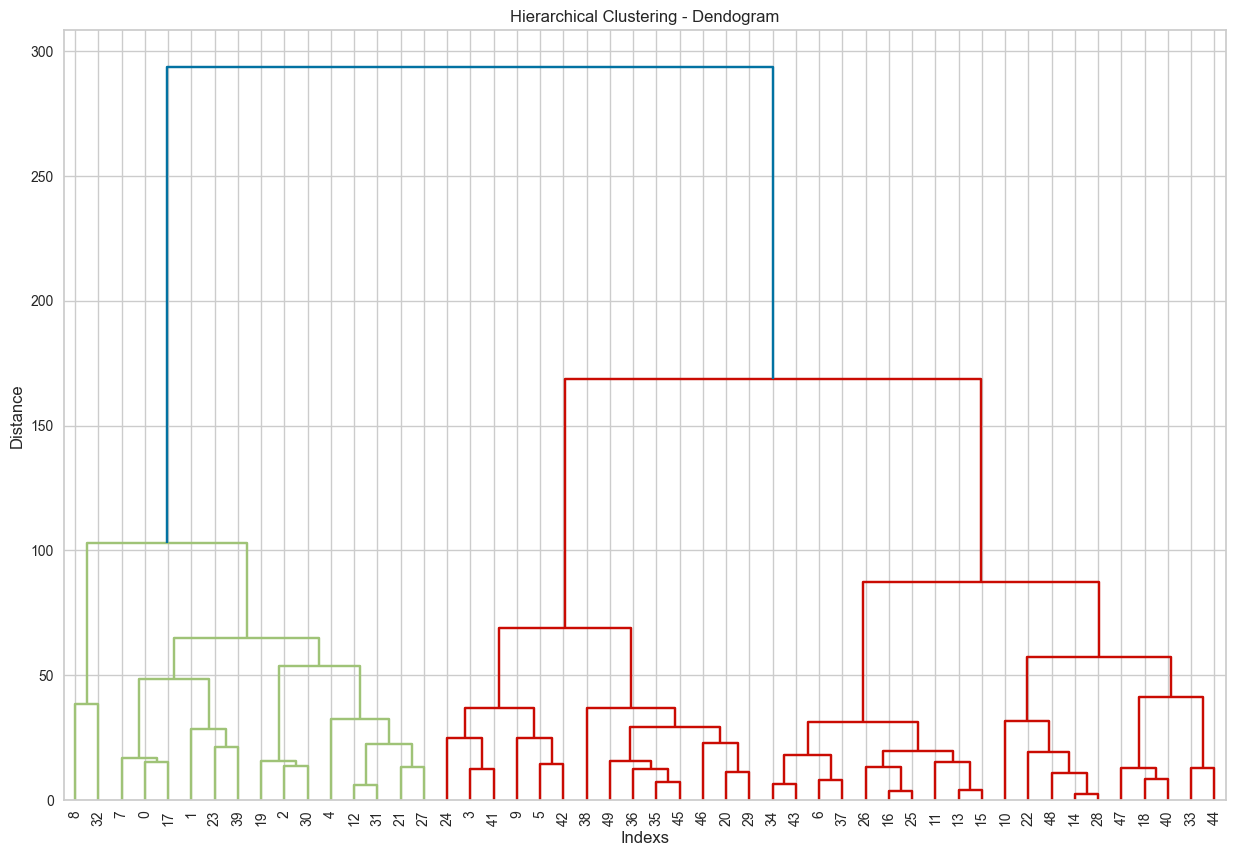

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering - Dendogram")
plt.xlabel("Indexs")
plt.ylabel("Distance")
scipy.cluster.hierarchy.dendrogram(hc_complete, leaf_font_size=10)
plt.show()

According to the dendogram, it is likely to be 3 or 4 group within the dataset.
I'll transform the dendogram to emphasize the connection between the observations. 

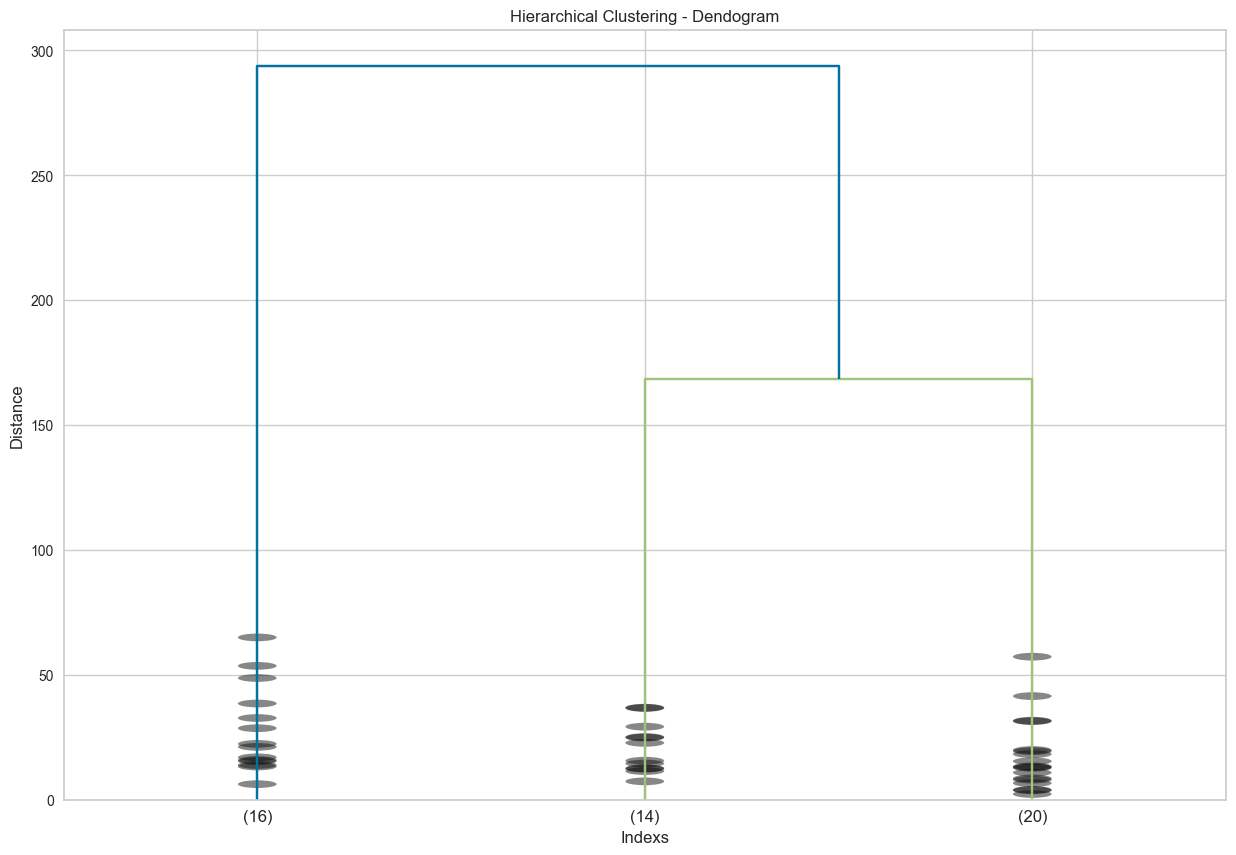

In [11]:
plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering - Dendogram")
plt.xlabel("Indexs")
plt.ylabel("Distance")
scipy.cluster.hierarchy.dendrogram(hc_complete, truncate_mode="lastp", p=3, show_contracted=True)
plt.show()

I'll train an agglomerative clustering model to predict the labels within the dataset.

In [12]:
# call model
agg_cluster = cluster.AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
# make the analysis
agg_prediction = agg_cluster.fit_predict(data)

/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


I'll use the 2 and 3D plots to visualize the results.

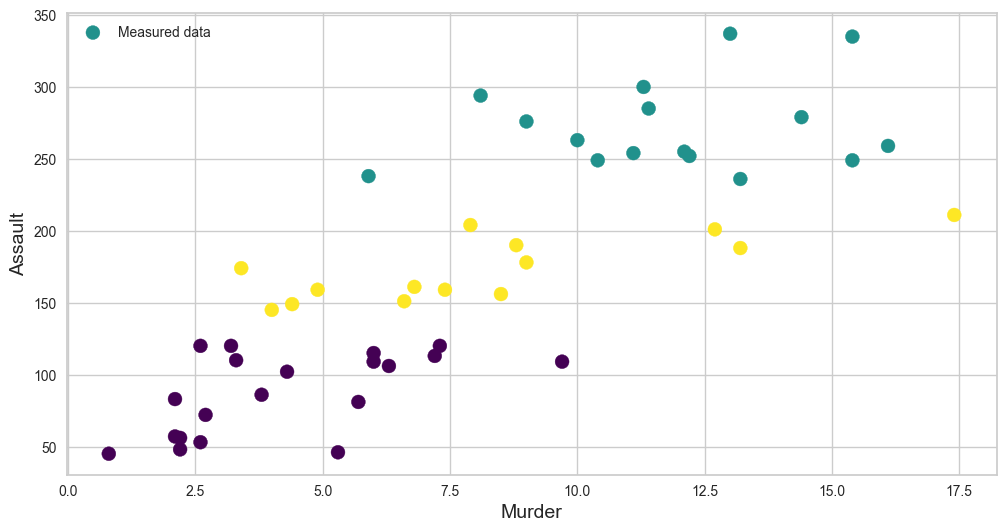

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(data["Murder"], data["Assault"], c=agg_prediction, cmap="viridis", label="Measured data", s=100)
# get cetroid location
plt.xlabel("Murder", fontsize=14)
plt.ylabel("Assault", fontsize=14)
plt.legend()
plt.show()

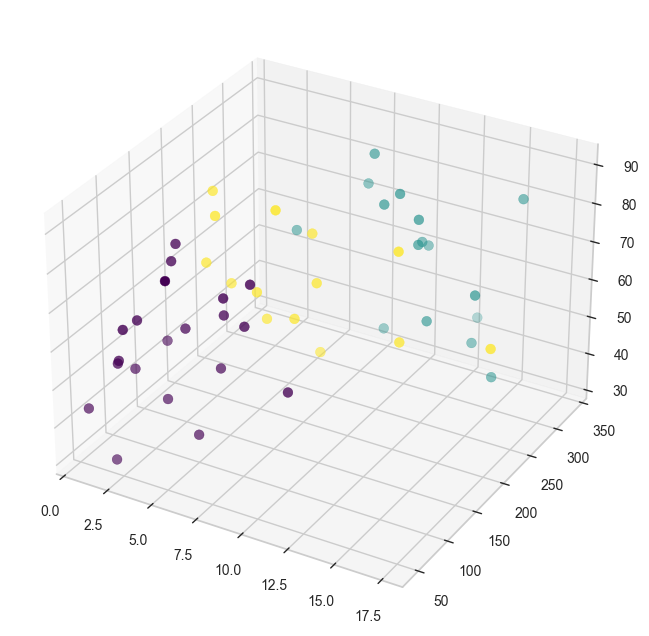

In [14]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
ax.scatter3D(data["Murder"], data["Assault"], data["UrbanPop"], c=agg_prediction, cmap="viridis", s=50)
plt.show()

### Principal Component Analysis
- PCA is a statistical technique for reducing the dimensionality of a dataset
- linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data
- enabling the visualization of multidimensional data

In [15]:
# call and train model
pca = decomposition.PCA(n_components=4)
pca_model = pca.fit(data)
# transform dataset
pca_fit = pca_model.transform(data)

The number of component is the number of new, reduced dimensions.
I'll visualize the effect of different component number to the covered variance. 

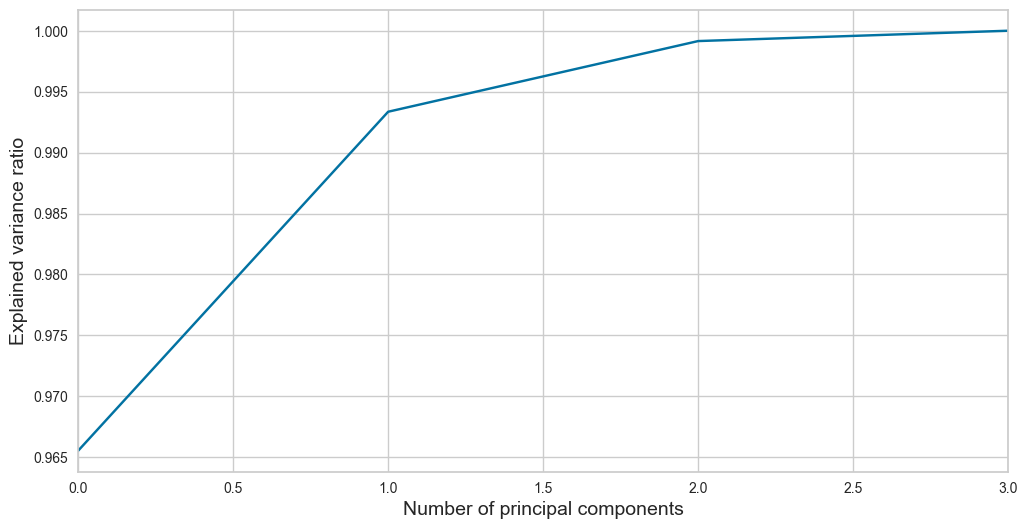

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlim(0,3)
plt.xlabel("Number of principal components", fontsize=14)
plt.ylabel("Explained variance ratio", fontsize=14)
plt.show()

According the explained variance plot, we can describe the 99.9% of the variance with two principal components.

In [17]:
# call and train model
pca_2 = decomposition.PCA(n_components=2)
pca_model_2 = pca_2.fit(data)
# transform dataset
pca_fit_2 = pca_model_2.transform(data)

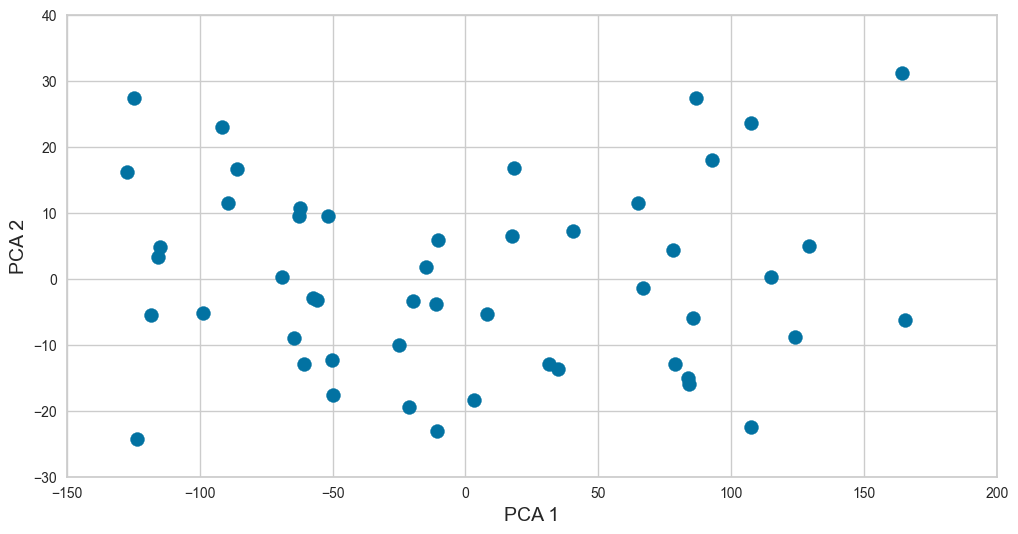

In [18]:
pca_df = pd.DataFrame(pca_fit_2)
# plot data
plt.figure(figsize=(12,6))
plt.scatter(pca_df[0], pca_df[1], s=100)
plt.xlim(-150, 200)
plt.ylim(-30,40)
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14)
plt.show()